# Exploratory Data Analysis (EDA) for Essay Data

This document presents a comprehensive Exploratory Data Analysis (EDA) of a dataset comprising student-written and Language Model (LM) generated essays. The analysis follows a structured approach to understand the underlying patterns and features of the data, which will inform subsequent stages of predictive modeling.

## Analysis Outline

1. **Data Loading and Initial Exploration**
    - We begin by loading our datasets and conducting a preliminary inspection to understand the structure and content of our data.

2. **Basic Statistics**
    - We delve into basic descriptive statistics to grasp the scale and scope of the data, assessing the balance between different types of essays and the completeness of the dataset.

3. **Essay Text Analysis**
    - This section focuses on quantifying essay lengths, frequency of words, and other linguistic features, utilizing NLP techniques to evaluate the complexity and structure of the sentences.

4. **Prompt Analysis**
    - We analyze the prompts to determine their impact on the essays' style and content, looking for patterns that may emerge in the responses.

5. **Generated vs. Student-Written Essays**
    - A comparative study is conducted to identify distinguishing characteristics between LM-generated and student-written essays.

6. **Correlation Analysis**
    - Statistical methods are employed to discover correlations between various features and the classification of the essays, which could be predictive in nature.

7. **Textual References to Source Text**
    - We investigate the nature of textual references to source material, comparing the referencing styles of LM-generated and student-written essays.

8. **Additional NLP Analysis**
    - Advanced NLP techniques are applied to extract deeper insights and prepare the data for more sophisticated applications, such as sentiment analysis and topic modeling.

9. **Documenting Findings**
    - All findings and hypotheses from the EDA are thoroughly documented to guide future steps in the model development process.

10. **Preparing for Next Steps**
    - Drawing from the insights gained during the EDA, we outline potential features for machine learning models and consider strategies for text data preprocessing.

---

**Note:** EDA is an exploratory and iterative process. Insights derived from this analysis will pave the way for more informed data processing, feature engineering, and model building in subsequent phases of the project.


Importing Libraries

In [70]:
import pandas as pd
import numpy as np
import os
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading and Initial Exploration

In this section, we load the datasets containing the essays and prompts. Our aim is to familiarize ourselves with the basic structure and content of these datasets.

- `train_essays.csv`: Contains the essays written by students and generated by LLMs.
- `train_prompts.csv`: Contains the prompts that were used to elicit the essays.

We will use Pandas, a powerful data manipulation library in Python, to load the CSV files into DataFrame objects. Once loaded, we'll display the first few rows to get an initial feel for the data, including the columns available and the type of information contained in each column.

**Tasks:**
- Load the datasets using `pd.read_csv()`.
- Use `df.head()` to display the first few entries of each DataFrame.


The length of the dataframe is: 2678


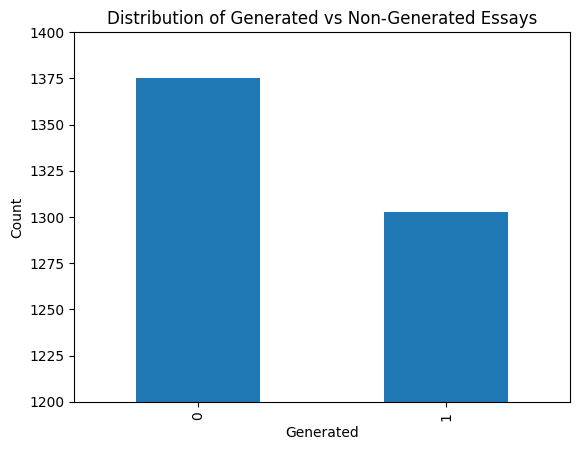

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a dataframe
df_new_train_essay = pd.read_csv('new_train_essay.csv')

# Display the length of the dataframe
length_df_new_train_essay = len(df_new_train_essay)
print(f"The length of the dataframe is: {length_df_new_train_essay}")

df_new_train_essay['generated'].value_counts().plot(kind='bar')
plt.title('Distribution of Generated vs Non-Generated Essays')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.ylim(1200, 1400)  # Change the y-axis limit to 1400
plt.show()


In [49]:
folder_path = '/datasets/essays-training/'

if os.path.exists(folder_path):
    print(os.listdir(folder_path))
else:
    print(f"The folder {folder_path} does not exist.")

['sample_submission.csv', 'test_essays.csv', 'train_essays.csv', 'train_prompts.csv']


In [37]:
df_train_essays = pd.read_csv('new_train_essay.csv')
df_train_prompts = pd.read_csv(f"{folder_path}/train_prompts.csv")

In [38]:
display(df_train_essays.head())
display(df_train_prompts.head())

,id,prompt_id,text,generated
0,58d8e644,0,The following are some of the advantages of li...,1
1,4e5899c1,1,"Dear State Senator,\nI am writing to you today...",1
2,a1913441,0,## Advantages of Limiting Car Usage\nCars have...,1
3,6c69eb76,1,"Dear Senator,\nI am writing to you today to ex...",1
4,5014eb83,0,The following are some of the advantages of li...,1


,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


## 2. Basic Statistics

After loading the data, we move on to explore basic statistical measures. This helps us gauge the dataset's size, the balance between different essay types, and the diversity of prompts used.

We'll assess:
- The total count of essays in the dataset.
- The proportion of student-written vs. LLM-generated essays.
- The number of unique prompts and their distribution across the dataset.
- Presence of any missing values that might need to be addressed.

**Tasks:**
- Use `df.describe()` and `df.info()` to get an overview of the data.
- Count the number of unique prompts using `df['prompt_id'].nunique()`.
- Check for missing values with `df.isnull().sum()`.


In [67]:
df_train_essays.describe()

,prompt_id,generated,word_count,text_length
count,2678.000000,2678.000000,2678.000000,2678.000000
mean,0.492905,0.486557,507.230769,2627.586258
std,0.500043,0.499913,179.905856,891.065081
min,0.000000,0.000000,165.000000,864.000000
25%,0.000000,0.000000,380.000000,2075.250000
50%,0.000000,0.000000,448.000000,2311.000000
75%,1.000000,1.000000,593.000000,3027.000000
max,1.000000,1.000000,1515.000000,8436.000000


In [39]:
# Count of essays
essay_count = df_train_essays['text'].count()

# Balance between generated and non-generated essays
balance = df_train_essays['generated'].value_counts()

# Number of unique prompts
unique_prompts = df_train_prompts['prompt_id'].nunique()

# Check for missing values in essays dataframe
missing_values_essays = df_train_essays.isnull().sum()

# Check for missing values in prompts dataframe
missing_values_prompts = df_train_prompts.isnull().sum()

print(f"Total number of essays: {essay_count}")
print(f"Balance between generated and non-generated essays:\n{balance}")
print(f"Number of unique prompts: {unique_prompts}")
print(f"Missing values in essays dataframe:\n{missing_values_essays}")
print(f"Missing values in prompts dataframe:\n{missing_values_prompts}")

Total number of essays: 2678
Balance between generated and non-generated essays:
0    1375
1    1303
Name: generated, dtype: int64
Number of unique prompts: 2
Missing values in essays dataframe:
id           0
prompt_id    0
text         0
generated    0
dtype: int64
Missing values in prompts dataframe:
prompt_id       0
prompt_name     0
instructions    0
source_text     0
dtype: int64


## 3. Essay Text Analysis

With our data now loaded, we will focus on analyzing the text of the essays. This involves examining the length of the essays in both words and characters, which can give us insights into the verbosity and information density of the content.

We will also perform a frequency analysis to identify which words and phrases are most common in the dataset. This may reveal certain biases or trends in topics and language usage.

Finally, we will apply Natural Language Processing (NLP) techniques to probe deeper into the grammar and complexity of sentence structures within the essays.

**Tasks:**
- Calculate the length of each essay in terms of words and characters.
- Create frequency distributions of words and phrases.
- Use NLP tools to tag parts of speech, parse sentence structures, and compute readability scores.


In [40]:
df_generated_essays = df_train_essays[df_train_essays['generated'] == 1].copy()
df_non_generated_essays = df_train_essays[df_train_essays['generated'] == 0].copy()

average_length_generated = df_generated_essays['text'].apply(lambda x: len(x)).mean()
average_length_nongenerated = df_non_generated_essays['text'].apply(lambda x: len(x)).mean()

print(f"The average length of each string in the text column for the generated essays is {average_length_generated:.2f}.")
print(f"The average length of each string in the text column for the non-generated essays is {average_length_nongenerated:.2f}.")

nltk.download('punkt')

def count_words(text):
    words = nltk.word_tokenize(text)
    return len(words)

df_train_essays['word_count'] = df_train_essays['text'].apply(count_words)
df_generated_essays['word_count'] = df_generated_essays['text'].apply(count_words)

average_word_count_train = df_train_essays['word_count'].mean()
average_word_count_generated = df_generated_essays['word_count'].mean()

print(f"The average word count of each text in df_train_essays is {average_word_count_train:.2f}.")
print(f"The average word count of each text in df_generated_essays is {average_word_count_generated:.2f}.")

The average length of each string in the text column for the generated essays is 2052.48.
The average length of each string in the text column for the non-generated essays is 3172.58.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The average word count of each text in df_train_essays is 507.23.
The average word count of each text in df_generated_essays is 385.57.


In [41]:
df_non_generated_essays_1 = df_train_essays[(df_train_essays['generated'] == 0) & (df_train_essays['prompt_id'] == 0)]
df_non_generated_essays_2 = df_train_essays[(df_train_essays['generated'] == 0) & (df_train_essays['prompt_id'] == 1)]
display(f"Number of essays with Prompt 1: {len(df_non_generated_essays_1)}")
display(f"Number of essays with Prompt 2: {len(df_non_generated_essays_2)}")

'Number of essays with Prompt 1: 707'

'Number of essays with Prompt 2: 668'

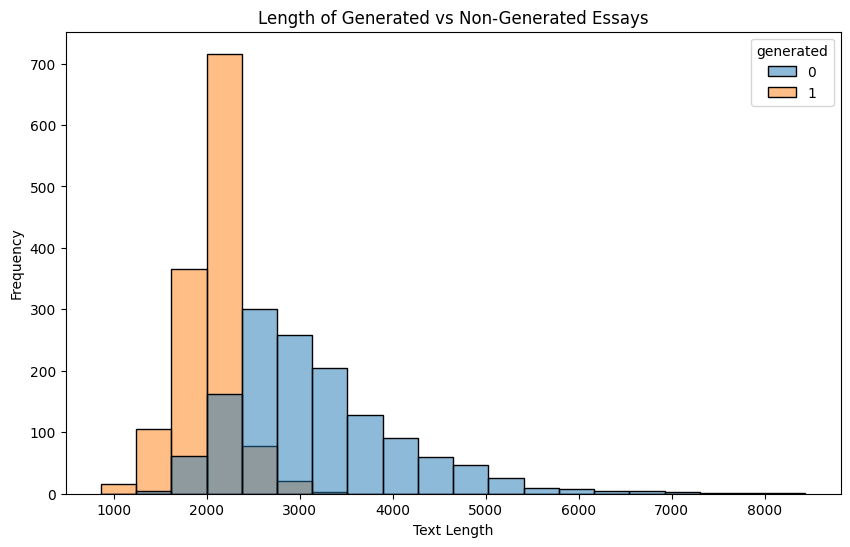

In [42]:
# Add a new column for text length
df_train_essays['text_length'] = df_train_essays['text'].apply(len)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train_essays, x='text_length', hue='generated', bins=20)
plt.title('Length of Generated vs Non-Generated Essays')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

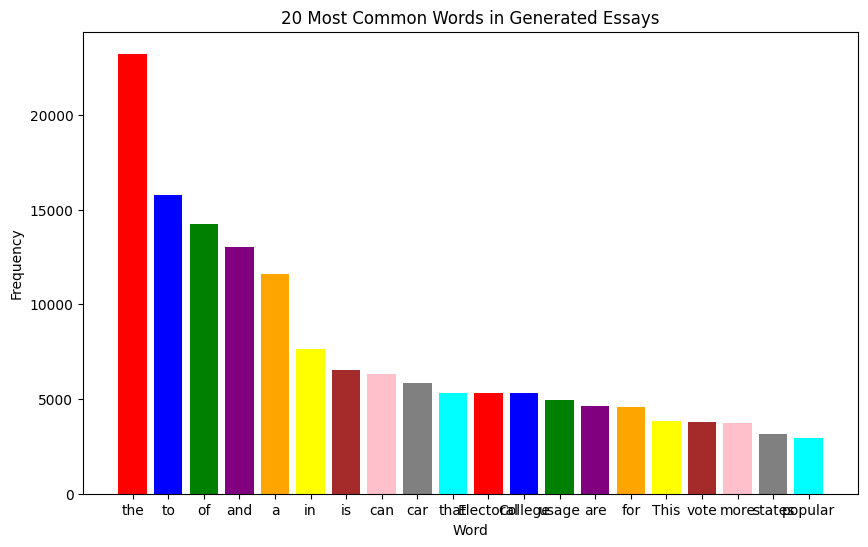

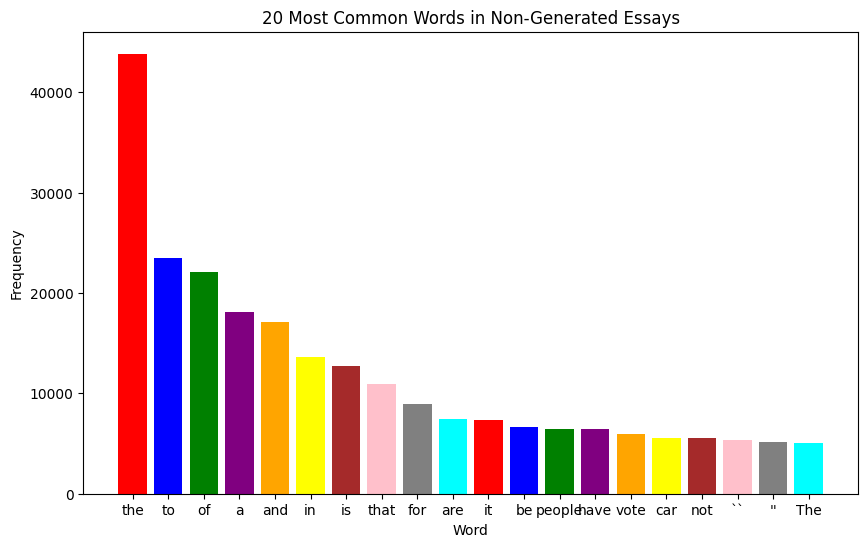

In [23]:
from nltk.probability import FreqDist
import string

def plot_most_common_words(texts, title, colors):
    """
    Plots the 10 most common words from a list of texts.

    :param texts: List of texts (string).
    :param title: Title for the plot.
    :param colors: List of colors for the bars in the plot.
    """
    # Tokenize the text and remove punctuation
    tokens = nltk.word_tokenize(' '.join(texts))
    tokens = [word for word in tokens if word not in string.punctuation]

    # Calculate the frequency distribution of words
    freq_dist = FreqDist(tokens)

    # Extracting the 10 most common words and their frequencies
    common = freq_dist.most_common(20)

    # Unzipping words and frequencies
    words, counts = zip(*common)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color=colors)
    plt.title(title)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.show()

# Define a list of colors to cycle through
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'brown', 'pink', 'gray', 'cyan']

# Assuming df_generated_essays and df_non_generated_essays are your dataframes
# Call the function for generated essays
plot_most_common_words(df_generated_essays['text'], '20 Most Common Words in Generated Essays', colors)

# Call the function for non-generated essays
plot_most_common_words(df_non_generated_essays['text'], '20 Most Common Words in Non-Generated Essays', colors)


In [ ]:
import spacy
from textstat import flesch_reading_ease, flesch_kincaid_grade

# Ensure necessary NLTK downloads
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# Download Spacy's English model
!python -m spacy download en_core_web_sm


# Load Spacy's English model
nlp = spacy.load('en_core_web_sm')

In [28]:

def analyze_essay_text(df):
    """
    Analyzes essay texts in a DataFrame using various NLP techniques.

    :param df: DataFrame containing a column 'text' with essay texts.
    :return: DataFrame with additional columns for NLP analysis.
    """
    # Tokenize the texts into sentences and words
    df['sentences'] = df['text'].apply(nltk.sent_tokenize)
    df['words'] = df['text'].apply(nltk.word_tokenize)

    # Analyze sentence structures using POS tagging
    df['pos_tags'] = df['words'].apply(nltk.pos_tag)

    # Dependency Parsing and NER
    def parse_and_ner(text):
        doc = nlp(text)
        return [(token.text, token.dep_, token.head.text, token.head.pos_, [child for child in token.children]) for token in doc], [(ent.text, ent.label_) for ent in doc.ents]

    df[['dependency_parse', 'named_entities']] = df['text'].apply(lambda x: pd.Series(parse_and_ner(x)))

    # Calculate the complexity of the texts
    df['flesch_reading_ease'] = df['text'].apply(flesch_reading_ease)
    df['flesch_kincaid_grade'] = df['text'].apply(flesch_kincaid_grade)

    # Lexical Diversity
    df['lexical_diversity'] = df['words'].apply(lambda x: len(set(x)) / len(x) if x else 0)

    return df

# Assuming df_generated_essays and df_non_generated_essays are your dataframes

df_generated_essays = analyze_essay_text(df_generated_essays)
df_non_generated_essays = analyze_essay_text(df_non_generated_essays)

# Now both dataframes have additional columns with NLP analysis


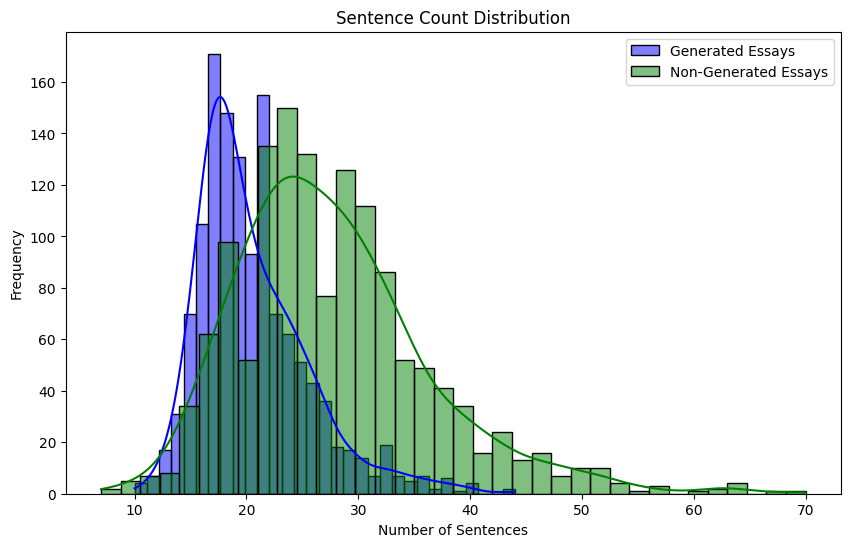

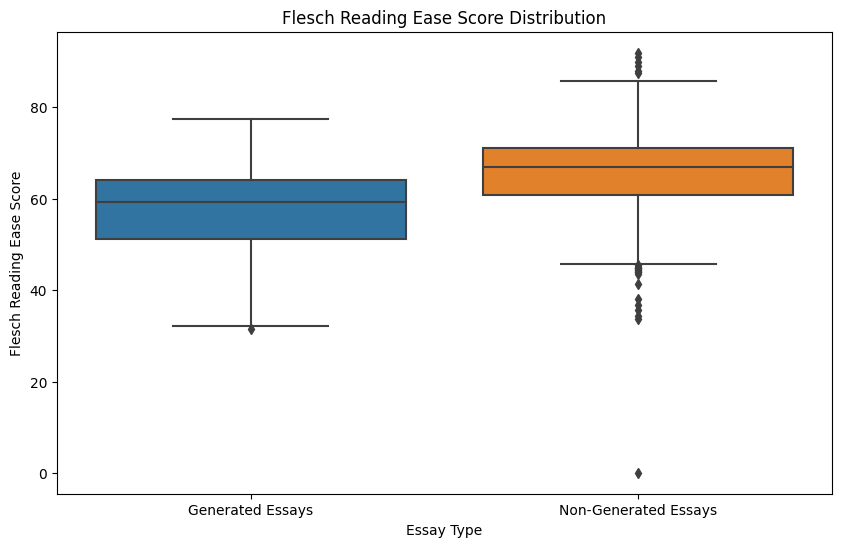

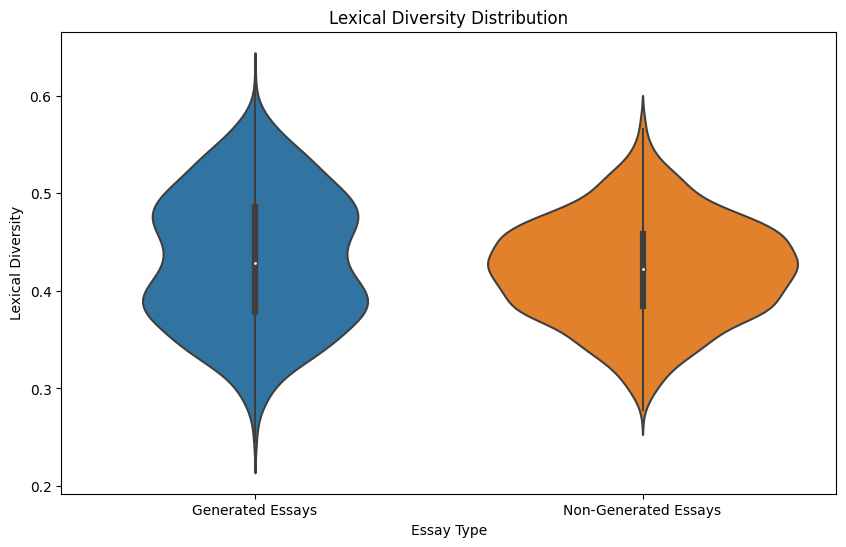

In [29]:
# Assuming df_generated_essays and df_non_generated_essays are your dataframes
# Example visualizations

# Sentence Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_generated_essays['sentences'].apply(len), kde=True, color='blue', label='Generated Essays')
sns.histplot(df_non_generated_essays['sentences'].apply(len), kde=True, color='green', label='Non-Generated Essays')
plt.title('Sentence Count Distribution')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Flesch Reading Ease
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df_generated_essays['flesch_reading_ease'], df_non_generated_essays['flesch_reading_ease']])
plt.title('Flesch Reading Ease Score Distribution')
plt.xlabel('Essay Type')
plt.ylabel('Flesch Reading Ease Score')
plt.xticks([0, 1], ['Generated Essays', 'Non-Generated Essays'])
plt.show()

# Lexical Diversity
plt.figure(figsize=(10, 6))
sns.violinplot(data=[df_generated_essays['lexical_diversity'], df_non_generated_essays['lexical_diversity']])
plt.title('Lexical Diversity Distribution')
plt.xlabel('Essay Type')
plt.ylabel('Lexical Diversity')
plt.xticks([0, 1], ['Generated Essays', 'Non-Generated Essays'])
plt.show()


## NLP Analysis Interpretation

### Flesch Reading Ease Score Distribution
The box plot shows that Generated Essays tend to have a narrower range and a higher median readability score, indicating more consistent and generally easier-to-read essays. In contrast, Non-Generated Essays show greater variability in readability, with a lower median score and several outliers with very low readability scores. This suggests that non-generated essays vary more in terms of how easy they are to read.

### Lexical Diversity Distribution
The violin plot illustrates that Generated Essays have a fairly symmetric distribution of lexical diversity around the median, indicating consistent use of vocabulary across these essays. The Non-Generated Essays display a less symmetric distribution with a pronounced peak at the median and tails that extend further, signifying a greater range of lexical diversity. This variation suggests a more varied use of language in the non-generated essays compared to the generated ones.


## 4. Prompt Analysis

The prompts provided to students can greatly influence the style and content of their essays. In this step, we aim to understand how.

We will analyze the text of the prompts, looking for specific instructions, topics, or features that may correlate with the essays' characteristics. This will involve qualitative analysis and may also include quantitative measures such as keyword frequency and prompt length.

**Tasks:**
- Analyze the content of the prompts for recurring themes or instructions.
- Quantify the frequency of keywords within the prompts.
- Examine the relationship between prompt characteristics and essay content and style.


In [27]:
print(folder_path)
os.listdir(folder_path)

df_train_essays = pd.read_csv(f"{folder_path}/train_prompts.csv")

df_train_essays.head()

/datasets/essays-training/


,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np

# Assuming the correct path to the prompts CSV file is provided
file_path_prompts = f"{folder_path}/train_prompts.csv"
df_train_prompts = pd.read_csv(file_path_prompts)

# Task 1, Step 1: Identify Common Themes using LDA for topic modeling
# We will use TF-IDF to transform our prompt instructions for LDA

# Adjust the max_df and min_df values
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=1, stop_words='english')  # Adjusted values
tfidf_prompts = tfidf_vectorizer.fit_transform(df_train_prompts['instructions'])


# Fit LDA model to prompts
n_topics = 5  # assuming we are looking for 5 topics; this number can be adjusted
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(tfidf_prompts)

# Display the top keywords for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tfidf_vectorizer.get_feature_names_out(), no_top_words)

# Task 2, Step 1: Calculate Term Frequency
count_vectorizer = CountVectorizer(stop_words='english')
count_prompts = count_vectorizer.fit_transform(df_train_prompts['instructions'])
term_freq = np.asarray(count_prompts.sum(axis=0)).ravel().tolist()
terms = count_vectorizer.get_feature_names_out()
term_freq_dict = dict(zip(terms, term_freq))

# Display the most common terms
print(sorted(term_freq_dict.items(), key=lambda item: item[1], reverse=True)[:no_top_words])

# Task 2, Step 2: TF-IDF Analysis
# Since we have already fit a TF-IDF Vectorizer, we can just display the IDF values
idf = tfidf_vectorizer.idf_
idf_dict = dict(zip(tfidf_vectorizer.get_feature_names_out(), idf))

# Display the terms with the lowest IDF values (most distinguishing terms)
print(sorted(idf_dict.items(), key=lambda item: item[1])[:no_top_words])


Topic 0:
ideas inform advantages fellow based car set usage citizens explanatory
Topic 1:
vote letter argue changing claim college counterclaims election electoral favor
Topic 2:
ideas inform advantages fellow based car set usage citizens explanatory
Topic 3:
ideas inform advantages fellow based car set usage citizens explanatory
Topic 4:
ideas inform advantages fellow based car set usage citizens explanatory
[('response', 9), ('essay', 6), ('write', 6), ('use', 3), ('avoid', 2), ('carefully', 2), ('edit', 2), ('evidence', 2), ('form', 2), ('information', 2)]
[('address', 1.4054651081081644), ('advantages', 1.4054651081081644), ('argue', 1.4054651081081644), ('based', 1.4054651081081644), ('car', 1.4054651081081644), ('changing', 1.4054651081081644), ('citizens', 1.4054651081081644), ('claim', 1.4054651081081644), ('college', 1.4054651081081644), ('counterclaims', 1.4054651081081644)]


Explained variation per principal component: [1.00000000e+00 6.45186531e-33]


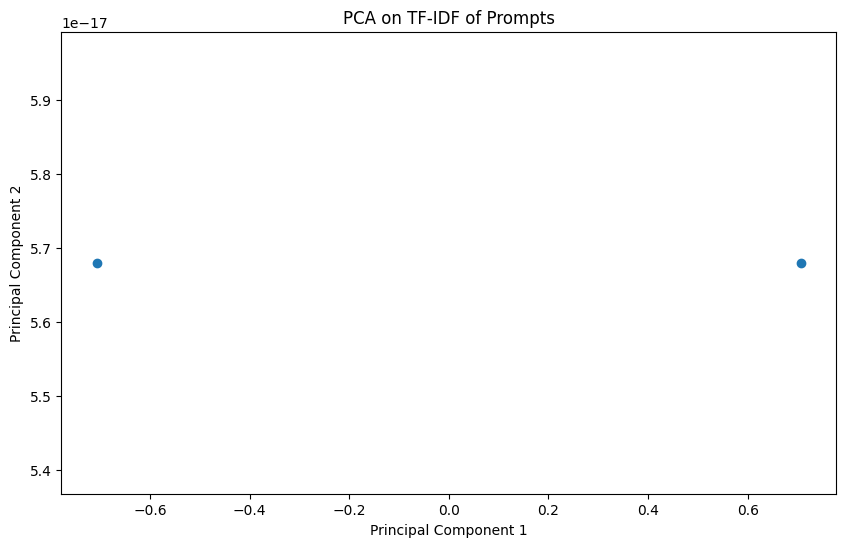

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming tfidf_prompts is your TF-IDF transformed data from the previous step

# Choose the number of components for PCA
n_components = 2  # For example, we choose 2 for easy visualization

# Initialize and fit PCA
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(tfidf_prompts.toarray())

# Variance explained by each component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# If you chose 2 components, you can easily visualize the result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on TF-IDF of Prompts')
plt.show()


## 5. Generated vs. Student-Written Essays

One of the core objectives of our EDA is to discern patterns or features that differentiate LLM-generated essays from those written by students. This could manifest in various aspects such as vocabulary richness, syntactic complexity, or semantic coherence.

In this step, we will employ various statistical and visualization tools to compare these features across the two types of essays. The goal is to uncover distinctive attributes that could help in later classification tasks.

**Tasks:**
- Compare vocabulary richness between the two groups by calculating metrics like type-token ratio.
- Analyze syntactic complexity by examining sentence length, structure, and diversity.
- Utilize visualization tools (e.g., histograms, box plots, word clouds) to compare the distribution of these features between generated and student-written essays.


In [59]:
def calculate_ttr(text):
    tokens = text.split()
    types = set(tokens)
    return len(types) / len(tokens) if tokens else 0

df_generated_essays['TTR'] = df_generated_essays['text'].apply(calculate_ttr)
df_non_generated_essays['TTR'] = df_non_generated_essays['text'].apply(calculate_ttr)


In [60]:
from nltk.tokenize import sent_tokenize, word_tokenize

def analyze_sentence_complexity(text):
    sentences = sent_tokenize(text)
    word_counts = [len(word_tokenize(sentence)) for sentence in sentences]
    avg_sentence_length = np.mean(word_counts)
    sentence_length_variability = np.std(word_counts)
    return avg_sentence_length, sentence_length_variability

df_generated_essays[['avg_sentence_length', 'sentence_length_variability']] = df_generated_essays['text'].apply(
    lambda x: pd.Series(analyze_sentence_complexity(x))
)
df_non_generated_essays[['avg_sentence_length', 'sentence_length_variability']] = df_non_generated_essays['text'].apply(
    lambda x: pd.Series(analyze_sentence_complexity(x))
)


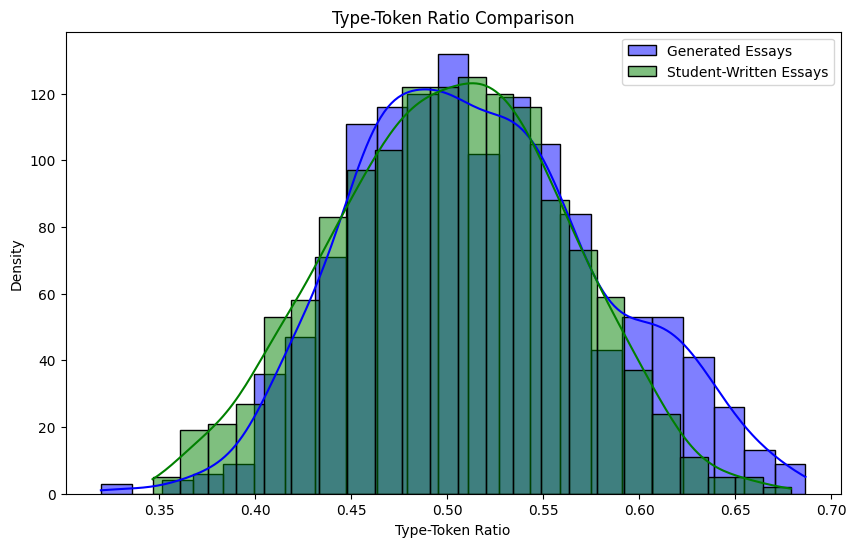

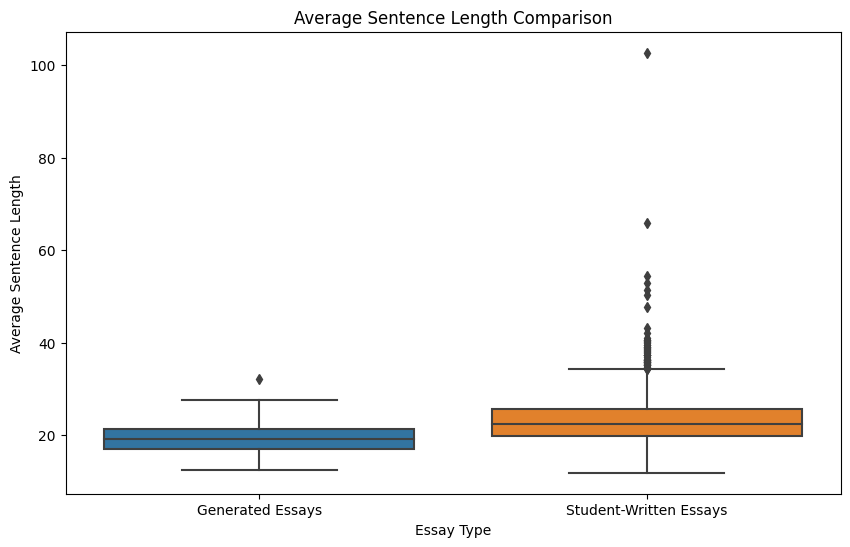

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# TTR Comparison
plt.figure(figsize=(10, 6))
sns.histplot(df_generated_essays['TTR'], color='blue', label='Generated Essays', kde=True)
sns.histplot(df_non_generated_essays['TTR'], color='green', label='Student-Written Essays', kde=True)
plt.title('Type-Token Ratio Comparison')
plt.xlabel('Type-Token Ratio')
plt.ylabel('Density')
plt.legend()
plt.show()

# Average Sentence Length Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df_generated_essays['avg_sentence_length'], df_non_generated_essays['avg_sentence_length']])
plt.title('Average Sentence Length Comparison')
plt.xlabel('Essay Type')
plt.ylabel('Average Sentence Length')
plt.xticks([0, 1], ['Generated Essays', 'Student-Written Essays'])
plt.show()


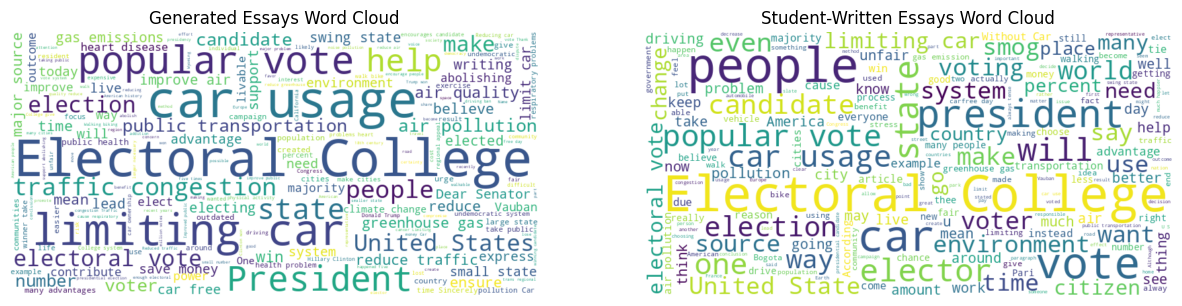

In [64]:
from wordcloud import WordCloud

# Combine all texts for each group
all_generated_text = ' '.join(df_generated_essays['text'])
all_student_text = ' '.join(df_non_generated_essays['text'])

# Generate word clouds
generated_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_generated_text)
student_wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_student_text)

# Display the word clouds
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(generated_wordcloud, interpolation='bilinear')
plt.title('Generated Essays Word Cloud')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(student_wordcloud, interpolation='bilinear')
plt.title('Student-Written Essays Word Cloud')
plt.axis("off")
plt.show()


## 6. Correlation Analysis

Understanding the relationships between different features of the essays and how they relate to the 'generated' label is crucial. This step involves exploring potential correlations that can unveil patterns and associations within our data.

We'll look for correlations between features such as essay length, lexical diversity, readability scores, and the binary classification of whether an essay is generated or not. Such insights can be instrumental when selecting features for machine learning models.

**Tasks:**
- Compute correlation coefficients between numerical features and the 'generated' label.
- Visualize these correlations using heatmaps or scatter plots.
- Interpret the correlation values to determine which features might be predictive of the essay's origin.


In [68]:
# Assuming df_essays is your DataFrame containing both generated and non-generated essays with all the features
# and 'generated' is a binary column where 1 indicates generated essays and 0 indicates student-written essays

# Compute correlation coefficients
correlation_matrix = df_train_essays.corr()

# Correlation with 'generated' label
correlation_with_generated = correlation_matrix['generated'].sort_values(ascending=False)
print(correlation_with_generated)


generated      1.000000
prompt_id      0.014562
text_length   -0.628410
word_count    -0.658450
Name: generated, dtype: float64


/tmp/ipykernel_91/148438327.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train_essays.corr()


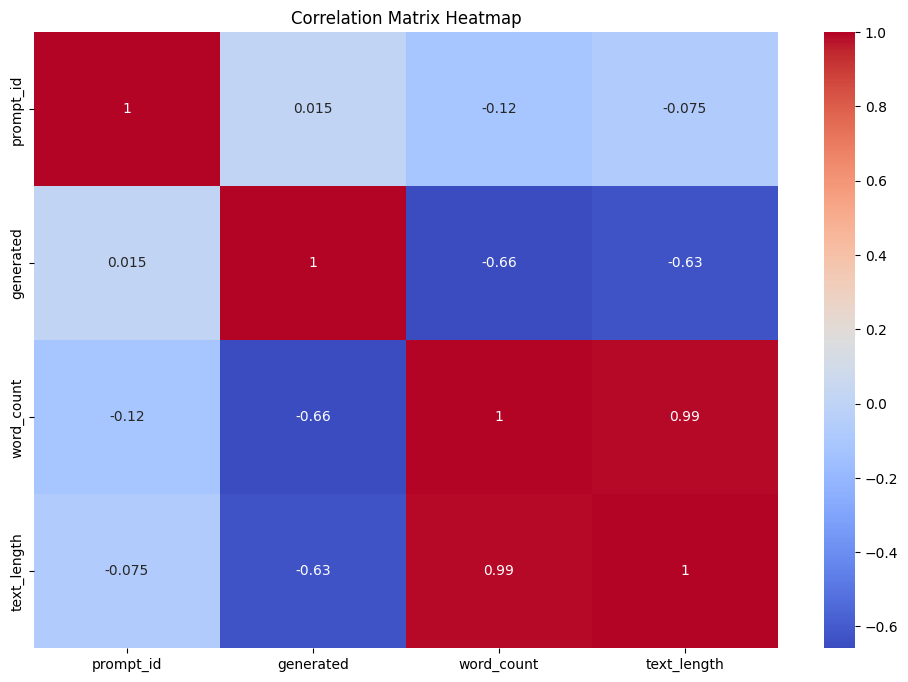

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


## Correlation Matrix Heatmap Interpretation

This heatmap provides a visual representation of the correlation coefficients between various features of the essays, including `prompt_id`, `generated`, `word_count`, and `text_length`.

- The `generated` feature has a strong negative correlation with both `word_count` and `text_length` (approximately -0.66 and -0.63, respectively). This suggests that essays identified as generated (likely by a language model) tend to have fewer words and be shorter in length compared to student-written essays.

- `word_count` and `text_length` are almost perfectly positively correlated (0.99), as expected, because the number of words directly contributes to the overall length of the text.

- The `prompt_id` has a very weak correlation with both `generated` (0.015) and `word_count` (-0.12), and `text_length` (-0.075). This indicates that the prompt ID, which could be a proxy for the topic or subject matter, has little to no direct relationship with whether an essay is generated or with the length of the essay.

- The negative correlations involving `generated` suggest that this could be an important feature for distinguishing between generated and student-written essays, as there seems to be a tendency for generated essays to be shorter and use fewer words. This might be reflective of the generation patterns of language models, which could favor brevity or have a set word limit during training or generation.

Overall, the insights from this correlation matrix could be instrumental in feature selection for predictive modeling, as they highlight which attributes of the essays are most associated with their origin (generated or student-written).


## 7. Textual References to Source Text

Given that essays are often written in response to a source text, it is important to understand how these references are integrated. This step focuses on the analysis of textual references within the essays.

We'll examine if there are discernible differences in how generated and student-written essays incorporate references to source texts. This could include direct quotes, paraphrasing, or thematic references.

**Tasks:**
- Identify and count direct quotes from the source text within the essays.
- Analyze the paraphrasing techniques used and their frequency.
- Compare the referencing styles between generated and student-written essays for patterns.


## 8. Additional NLP Analysis

To glean deeper insights from our text data, we will now apply advanced Natural Language Processing techniques. This can help us uncover underlying themes, sentiments, and named entities within the essays.

Sentiment analysis can reveal the emotional tone of the essays. Named entity recognition can identify key subjects and topics. Topic modeling can uncover thematic structures across the dataset.

**Tasks:**
- Perform sentiment analysis to assess the emotional tone of each essay.
- Use named entity recognition to detect and categorize entities mentioned in the texts.
- Apply topic modeling techniques to discover latent topics within the essays.


## 9. Documenting Findings

As we delve into the EDA, it's essential to meticulously document our findings and any hypotheses that arise. This documentation not only aids our understanding but also serves as a reference for future steps in the research and model development process.

In this phase, we summarize the insights from the analysis, note any patterns or anomalies observed, and record questions or hypotheses that we may want to test later.

**Tasks:**
- Summarize key insights and takeaways from the previous analysis steps.
- Note any unexpected patterns or potential biases in the data.
- Formulate hypotheses based on the observed data trends and relationships.
- Record any considerations or questions to investigate in future research.


## 10. Preparing for Next Steps

With the EDA nearing completion, we shift our focus to laying the groundwork for feature engineering and model building. The insights gained during the EDA will inform our decisions about which features to create and how to preprocess our text data for optimal model performance.

This step involves conceptualizing the data pipeline, considering data transformations, and planning for the integration of NLP techniques into our machine learning workflow.

**Tasks:**
- Identify and list potential features for the machine learning model based on EDA findings.
- Outline the preprocessing steps required for the raw text data.
- Consider the application of NLP techniques for feature extraction.
- Plan the data pipeline structure from raw data to model input.
